# Heart Attacke Analysis & Prediction Dataset
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data

## Read Packages & Dataset

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [6]:
df = pd.read_csv('heart.csv')

In [7]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## EDA

Column Detail
- age: Continuous Data
- sex: Categorical Data
- cp (Chest Pain Type): Categorical Data
    - 1: Typical Angina
    - 2: Atypical Angina
    - 3: Non-Anginal Pain
    - 4: Asymptomatic
- trtbps (Resting Blood Pressure): Continuous Data
- chol (Cholestoral): Continuous Data
- fbs (Fasting Blood Sugar): Categorical Data
- restecg (Resting Electrocardiographic Results): Categorical Data
- exng (Exercise Induced Angina): Categorical Data
- oldpeak (Previous Peak): Continuous Data
- slp (Slope): Categorical Data
- caa (Number of Major Vessels): Categorical Data
- thall (Thal Rate): Categorical Data
- output (Targer): Categorical Data


#### 1. Categorical Data

In [9]:
df["sex"] = df["sex"].astype(str)
df["cp"] = df["cp"].astype(str)
df["fbs"] = df["fbs"].astype(str)
df["restecg"] = df["restecg"].astype(str)
df["exng"] = df["exng"].astype(str)
df["slp"] = df["slp"].astype(str)
df["caa"] = df["caa"].astype(str)
df["output"] = df["output"].astype(str)

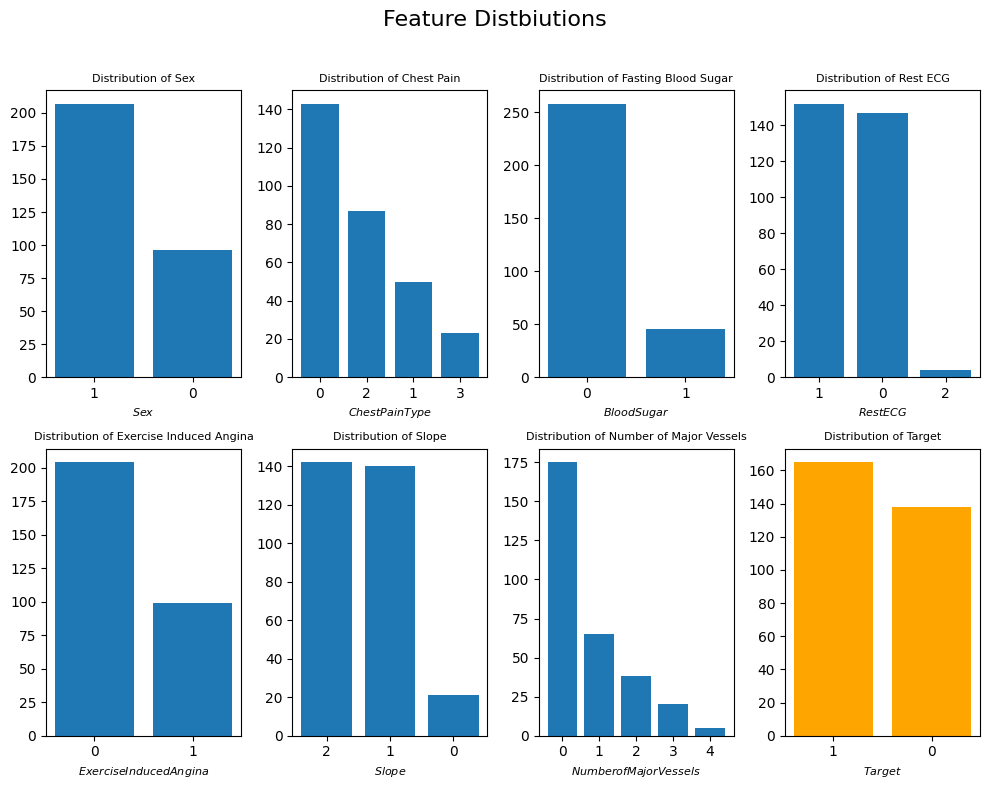

In [10]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (10, 8))

ax[0, 0].bar(
    x = df["sex"].value_counts().keys(),
    height = df["sex"].value_counts().values
)
ax[0, 0].set_title("Distribution of Sex", fontsize = 8)
ax[0, 0].set_xlabel("$\it{Sex}$", fontsize = 8)
# ax[0, 0].set_ylabel("Frequency")

ax[0, 1].bar(
    x = df["cp"].value_counts().keys(),
    height = df["cp"].value_counts().values
)
ax[0, 1].set_title("Distribution of Chest Pain", fontsize = 8)
ax[0, 1].set_xlabel("$\it{Chest Pain Type}$", fontsize = 8)
# ax[0, 1].set_ylable("Frequency")

ax[0, 2].bar(
    x = df["fbs"].value_counts().keys(),
    height = df["fbs"].value_counts().values
)
ax[0, 2].set_title("Distribution of Fasting Blood Sugar", fontsize = 8)
ax[0, 2].set_xlabel("$\it{Blood Sugar}$", fontsize = 8)
# ax[0, 2].set_ylable("Frequency")

ax[0, 3].bar(
    x = df["restecg"].value_counts().keys(),
    height = df["restecg"].value_counts().values
)
ax[0, 3].set_title("Distribution of Rest ECG", fontsize = 8)
ax[0, 3].set_xlabel("$\it{Rest ECG}$", fontsize = 8)
# ax[0, 3].set_ylabel("Frequency")

ax[1, 0].bar(
    x = df["exng"].value_counts().keys(),
    height = df["exng"].value_counts().values
)
ax[1, 0].set_title("Distribution of Exercise Induced Angina", fontsize = 8)
ax[1, 0].set_xlabel("$\it{Exercise Induced Angina}$", fontsize = 8)
# ax[1, 0].set_ylabel("Frequency")

ax[1, 1].bar(
    x = df["slp"].value_counts().keys(),
    height = df["slp"].value_counts().values
)
ax[1, 1].set_title("Distribution of Slope", fontsize = 8)
ax[1, 1].set_xlabel("$\it{Slope}$", fontsize = 8)

ax[1, 2].bar(
    x = df["caa"].value_counts().keys(),
    height = df["caa"].value_counts().values
)
ax[1, 2].set_title("Distribution of Number of Major Vessels", fontsize = 8)
ax[1, 2].set_xlabel("$\it{Number of Major Vessels}$", fontsize = 8)

ax[1, 3].bar(
    x = df["output"].value_counts().keys(),
    height = df["output"].value_counts().values, 
    color = "orange"
)
ax[1, 3].set_title("Distribution of Target", fontsize = 8)
ax[1, 3].set_xlabel("$\it{Target}$", fontsize = 8)

fig.suptitle("Feature Distbiutions", fontsize = 16)
fig.tight_layout()
fig.subplots_adjust(top = 0.88)
plt.show()

#### 2. Numerical Data

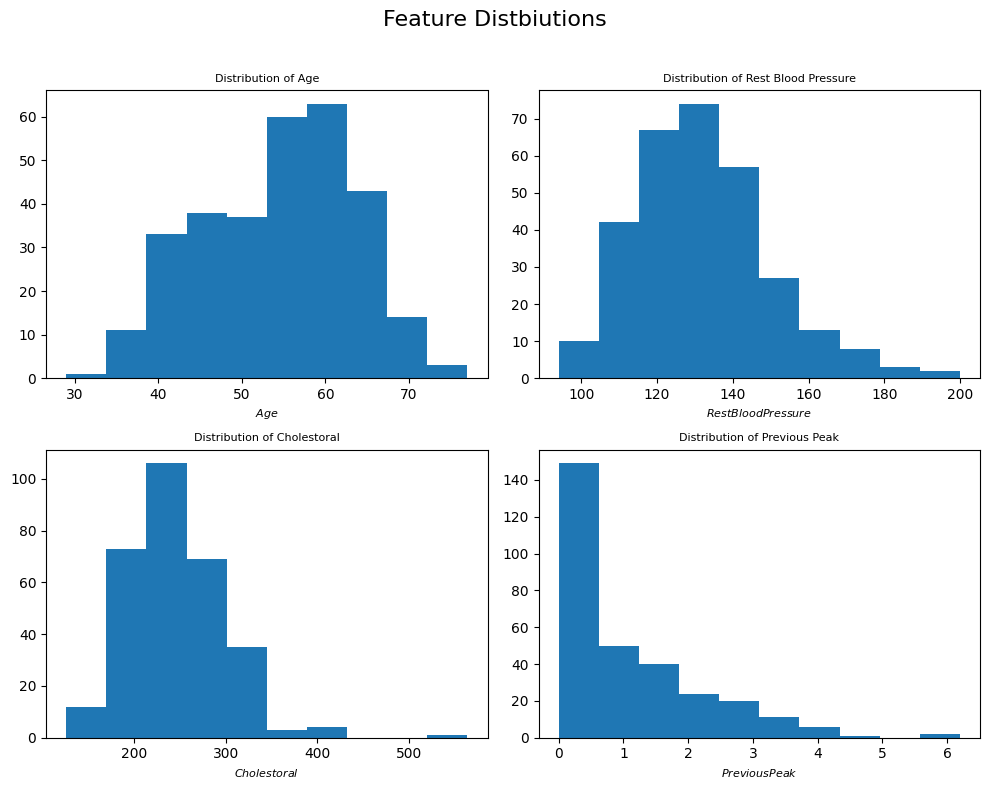

In [11]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 8))

ax[0, 0].hist(df["age"])
ax[0, 0].set_title("Distribution of Age", fontsize = 8)
ax[0, 0].set_xlabel("$\it{Age}$", fontsize = 8)

ax[0, 1].hist(df["trtbps"])
ax[0, 1].set_title("Distribution of Rest Blood Pressure", fontsize = 8)
ax[0, 1].set_xlabel("$\it{Rest Blood Pressure}$", fontsize = 8)

ax[1, 0].hist(df["chol"])
ax[1, 0].set_title("Distribution of Cholestoral", fontsize = 8)
ax[1, 0].set_xlabel("$\it{Cholestoral}$", fontsize = 8)

ax[1, 1].hist(df["oldpeak"])
ax[1, 1].set_title("Distribution of Previous Peak", fontsize = 8)
ax[1, 1].set_xlabel("$\it{Previous Peak}$", fontsize = 8)

fig.suptitle("Feature Distbiutions", fontsize = 16)
fig.tight_layout()
fig.subplots_adjust(top = 0.88)
plt.show()

### Correlation

#### ->  All Features

<Axes: >

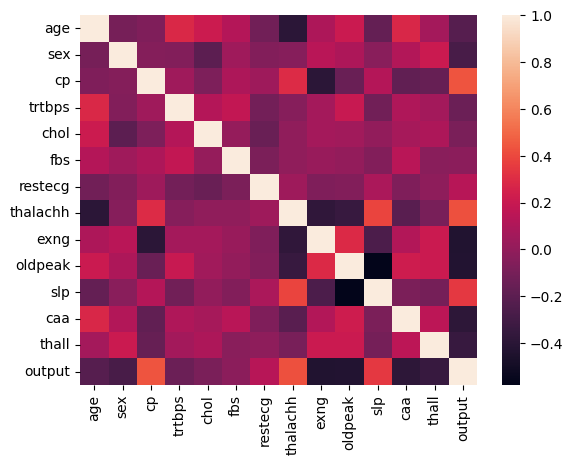

In [12]:
sns.heatmap(df.corr())

#### ->  Numberic Features

In [13]:
df_num = df[["age", 'trtbps', 'chol', 'oldpeak', 'output']]

<Axes: >

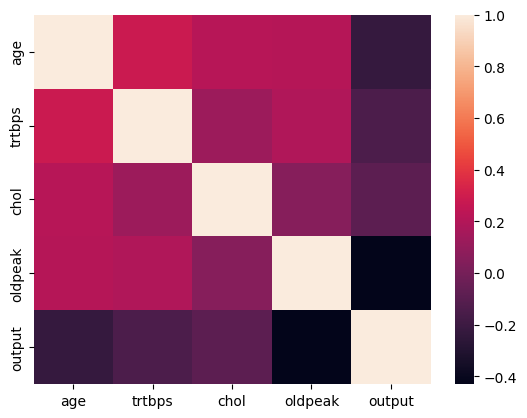

In [14]:
sns.heatmap(df_num.corr())

Columns exng, oldpeak, caa, and thall have high correlation with output!

## Feature Engineering

- Use standardization on numerical features
- Apply One-Hot encoder on categorical features

In [15]:
# Create the preprocessing pipelines for both numeric and categorical data
numeric_features = ["age", "trtbps", "chol", "oldpeak"]
numeric_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])

categorical_features = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa"]
categorical_transformer = Pipeline(steps = [
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

In [16]:
preprocessor = ColumnTransformer(
transformers = [
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

## Modeling - Logistic Regression

In [17]:
# Append classifier to preprocessing pipeline
clf = Pipeline(steps = [('preprocessor', preprocessor),
                       ('classifier', LogisticRegression())])

In [18]:
X = df.drop('output', axis = 1)
y = df['output']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trtbps', 'chol',
                                                   'oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exng', 'slp',
                                                   'caa'])])),
                ('classifier', LogisticRegression())])

In [22]:
# Evaluation
accu = clf.score(X_test, y_test)
AUC = metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

print("Model Score: %.3f" % accu)
print("AUC: %.3f" % AUC)

Model Score: 0.803
AUC: 0.841


## Modeling - Random Forest

In [31]:
# Create the preprocessing pipelines for both numeric and categorical data
numeric_features = ["age", "trtbps", "chol", "oldpeak"]
numeric_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])

In [32]:
preprocessor = ColumnTransformer(
transformers = [
    ('num', numeric_transformer, numeric_features)])

In [33]:
# Append classifier to preprocessing pipeline
clf = Pipeline(steps = [('preprocessor', preprocessor),
                       ('classifier', RandomForestClassifier())])

In [34]:
X = df.drop('output', axis = 1)
y = df['output']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [36]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trtbps', 'chol',
                                                   'oldpeak'])])),
                ('classifier', RandomForestClassifier())])

In [37]:
# Evaluation
accu = clf.score(X_test, y_test)
AUC = metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

print("model score: %.3f" % accu)
print("AUC: %.3f" % AUC)

model score: 0.607
AUC: 0.655
